# QC Notebook

This notebook assesses the quality of the extracted imaged data by plotting intensity metrics per marker sorted by time of acquisition. This will help you identify anomalous changes that may indicate systematic error related to the image acquisition process, and not with the samples themselves.

In [ ]:
import os
import natsort as ns

from toffy import qc_comp
from alpineer import io_utils

### Define file parameters

- `run_name` should contain the exact name of the MIBI run to extract qc data from 

In [ ]:
# the name of the run
run_name = 'YYYY-MM-DD_run_name'

Everything necessary for and subsequently outputted from this notebook is stored in the automatic directories established in `1_set_up_toffy.ipynb`. More information on the uses and locations of the directories in toffy can be found in the [README](https://github.com/angelolab/toffy#directory-structure).

In [ ]:
# set up directories
extracted_imgs_path = os.path.join('D:\\Extracted_Images', run_name)
qc_out_dir = os.path.join('C:\\Users\\Customer.ION\\Documents\\run_metrics', run_name, 'fov_data')

# path where plots will get saved
plot_dir = os.path.join('C:\\Users\\Customer.ION\\Documents\\run_metrics', run_name)

# make qc_dir if it doesn't exist
if not os.path.exists(qc_out_dir):
    os.makedirs(qc_out_dir)

### Create QC metric tables

In [ ]:
# retrieve all the fov names from the extracted images directory
fovs = io_utils.list_folders(extracted_imgs_path, substrs='fov-')

# run QC metric extraction on each fov that doesn't have QC metric files defined
# saves directly to qc_out_dir
for fov in ns.natsorted(fovs):
    # NOTE: if nonzero_mean_stats.csv doesn't exist, the other QC metric .csv paths also don't exist
    if not os.path.exists(os.path.join(qc_out_dir, '%s_nonzero_mean_stats.csv' % fov)):
        print("Extracting QC metrics for fov %s" % fov)
        qc_comp.compute_qc_metrics(
            extracted_imgs_path,
            fov, 
            save_csv=qc_out_dir
        )

### Visualize QC metrics

In [7]:
# prior to generating the graphs, need to combine the QC metrics for each FOV into one combined .csv
qc_comp.combine_qc_metrics(qc_out_dir)

Average marker intensity is plotted to assess staining over the course of a run.

These plots are used to diagnose sudden, large, coordinated changes in marker intensity across multiple channels. A gradual decrease in signal intensity over time, with small amounts of FOV-to-FOV variation, is expected. However, a sudden change in signal during the middle of a run can indicate a problem, as can large differences in intensity between subsequent runs. 

Using Ki67 as an example marker, this chart is not problematic:

<div>
    <img src="img/qc_drift_good.png" width="300" height="274"/>
</div>

This one indicates issues:

<div>
    <img src="img/qc_drift_bad.png" width="300" height="274"/>
</div>

`qc_metric` can also be set to `'Total intensity'` or `'99.9% intensity value'`. Similar analyses as outlined above can be applied to these metrics.

Note that the plots produced will get saved as a png file in `C:\\Users\\Customer.ION\\Documents\\run_metrics\\run_name` for later reference.

In [ ]:
qc_metric = 'Non-zero mean intensity'

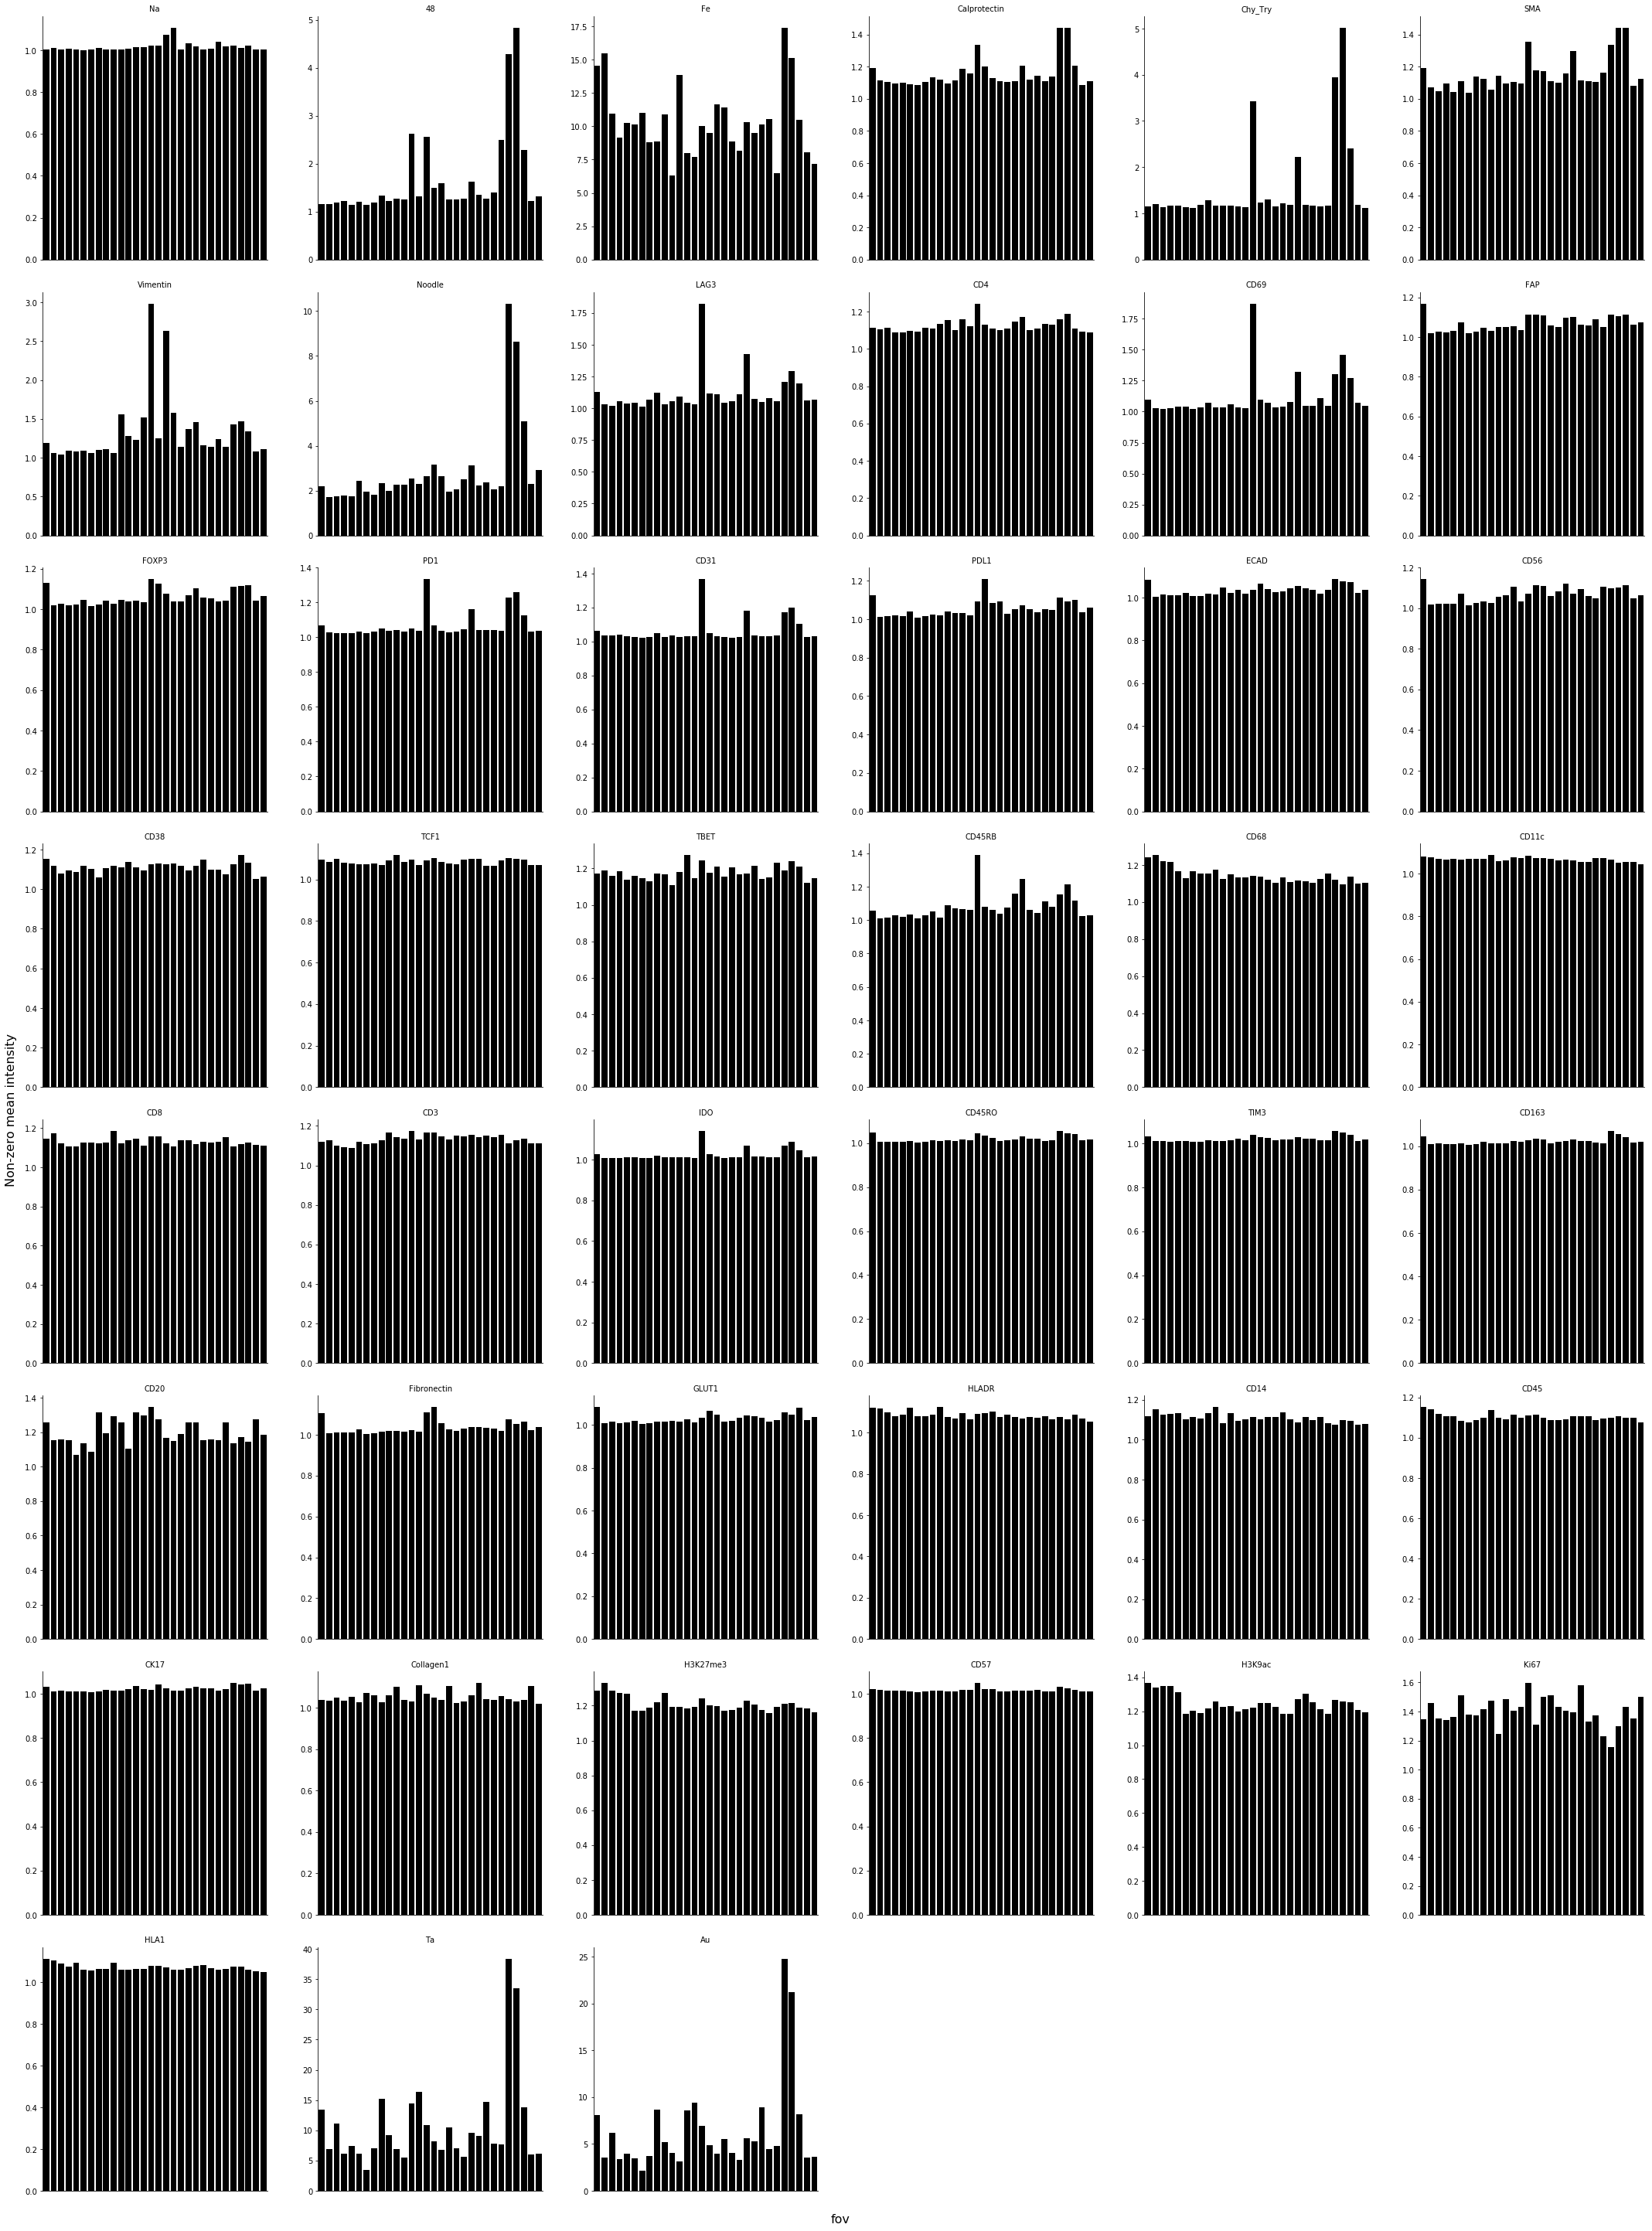

In [11]:
# visualize the QC stats
qc_comp.visualize_qc_metrics(
    qc_metric,
    qc_out_dir,
    axes_font_size=16,
    wrap=6,
    dpi=None,
    save_dir=plot_dir
)